In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
raw_data = pd.read_csv('Orders.csv')

In [3]:
raw_data.head()

,Row.ID,Order.ID,Order.Date,Ship.Date,Ship.Mode,Customer.ID,Customer.Name,Segment,Postal.Code,City,...,Product.ID,Category,Sub.Category,Product.Name,Sales,Quantity,Discount,Profit,Shipping.Cost,Order.Priority
0,40098,CA-2014-AB10015140-41954,11/11/14,11/13/14,First Class,AB-100151402,Aaron Bergman,Consumer,73120.0,Oklahoma City,...,TEC-PH-5816,Technology,Phones,Samsung Convoy 3,$221.98,2,0.0,$62.15,40.77,High
1,26341,IN-2014-JR162107-41675,2/5/14,2/7/14,Second Class,JR-162107,Justin Ritter,Corporate,NaN,Wollongong,...,FUR-CH-5379,Furniture,Chairs,"Novimex Executive Leather Armchair, Black","$3,709.40",9,0.1,-$288.77,923.63,Critical
2,25330,IN-2014-CR127307-41929,10/17/14,10/18/14,First Class,CR-127307,Craig Reiter,Consumer,NaN,Brisbane,...,TEC-PH-5356,Technology,Phones,"Nokia Smart Phone, with Caller ID","$5,175.17",9,0.1,$919.97,915.49,Medium
3,13524,ES-2014-KM1637548-41667,1/28/14,1/30/14,First Class,KM-1637548,Katherine Murray,Home Office,NaN,Berlin,...,TEC-PH-5267,Technology,Phones,"Motorola Smart Phone, Cordless","$2,892.51",5,0.1,-$96.54,910.16,Medium
4,47221,SG-2014-RH9495111-41948,11/5/14,11/6/14,Same Day,RH-9495111,Rick Hansen,Consumer,NaN,Dakar,...,TEC-CO-6011,Technology,Copiers,"Sharp Wireless Fax, High-Speed","$2,832.96",8,0.0,$311.52,903.04,Critical


In [4]:
data_clean = raw_data.copy()

## Question 1

In [7]:
data_clean["Sales"] = pd.to_numeric(raw_data['Sales'].str.replace('$', '').str.replace(',', ''))
data_clean['Profit'] = pd.to_numeric(raw_data['Profit'].str.replace('$', '').str.replace(',', ''))

In [8]:
data_clean.dtypes

Row.ID              int64
Order.ID           object
Order.Date         object
Ship.Date          object
Ship.Mode          object
Customer.ID        object
Customer.Name      object
Segment            object
Postal.Code       float64
City               object
State              object
Country            object
Region             object
Market             object
Product.ID         object
Category           object
Sub.Category       object
Product.Name       object
Sales             float64
Quantity            int64
Discount          float64
Profit            float64
Shipping.Cost     float64
Order.Priority     object
dtype: object

## Question 2

In [10]:
data_clean['Order.Date'] = pd.to_datetime(data_clean['Order.Date'])

In [11]:
data_clean['Year'] = pd.DatetimeIndex(data_clean['Order.Date']).year

In [12]:
data_clean['Month'] = pd.DatetimeIndex(data_clean['Order.Date']).month

In [18]:
data_grp = data_clean.groupby('Month', as_index=False).sum()

In [19]:
data_grp.head()

,Month,Row.ID,Postal.Code,Sales,Quantity,Discount,Profit,Shipping.Cost,Year
0,1,71468915,21500486.0,676789.30,8872,365.122,73440.45,71225.18900,5258055
1,2,60085551,17761468.0,554650.21,7429,307.574,72932.18,59878.28000,4448403
2,3,79093205,36758872.0,760518.34,10390,432.354,91873.45,76723.92404,6055482
3,4,75926778,34498859.0,695978.86,10466,448.146,73822.57,75072.86600,6105764
4,5,98261611,40926610.0,915493.24,13196,543.822,106970.07,102015.17500,7626250


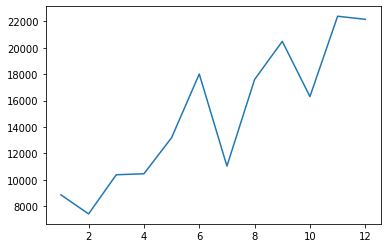

In [20]:
plt.plot(data_grp['Month'], data_grp['Quantity'])

<BarContainer object of 12 artists>

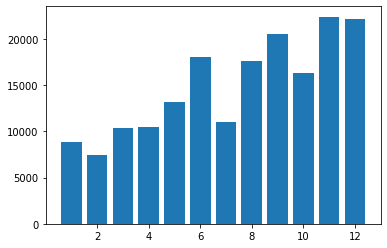

In [24]:
plt.bar(data_grp['Month'], data_grp['Quantity'])

In [26]:
group2 = data_clean.groupby(['Year','Month'], as_index=False).sum()
group2.head()

,Year,Month,Row.ID,Postal.Code,Sales,Quantity,Discount,Profit,Shipping.Cost
0,2012,1,12288294,4249606.0,98898.53,1463,68.758,8321.76,10596.7880
1,2012,2,11980366,3844568.0,103718.01,1401,58.192,14323.02,12051.3230
2,2012,3,13894063,7805920.0,135746.52,1745,74.272,13089.59,12207.4935
3,2012,4,14688313,7530343.0,114332.99,1934,74.782,13211.11,12631.0520
4,2012,5,16010056,7031312.0,158228.35,2167,87.472,14644.10,17691.7640


In [ ]:
plt.plot( 'x', 'y1', data=df, marker='o', markerfacecolor='blue', markersize=12, color='skyblue', linewidth=4)


In [39]:
data_clean.Category.unique()

array(['Technology', 'Furniture', 'Office Supplies'], dtype=object)

In [40]:
group3 = data_clean.groupby(['Month', 'Category'], as_index=False).sum()

In [42]:
group3.head()

,Month,Category,Row.ID,Postal.Code,Sales,Quantity,Discount,Profit,Shipping.Cost,Year
0,1,Furniture,12689244,4614285.0,228829.15,1750,80.820,14224.86,23256.435,988772
1,1,Office Supplies,45191860,12903363.0,222428.77,5480,218.930,30885.57,23154.366,3254290
2,1,Technology,13587811,3982838.0,225531.38,1642,65.372,28330.02,24814.388,1014993
3,2,Furniture,11089801,4118202.0,190255.60,1494,66.590,18321.97,20880.321,853833
4,2,Office Supplies,36684342,9994734.0,157169.49,4340,175.950,22224.46,17927.632,2656169


ValueError: x and y must have same first dimension, but have shapes (36,) and (12,)

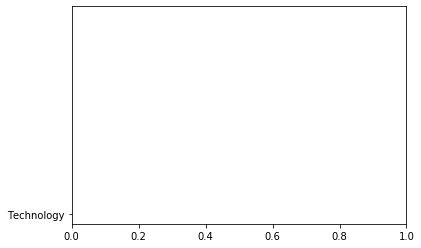

In [44]:
plt.plot(group3['Month'], group3.Category[group3.Category=='Technology'])